In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.atr_adx_sma_m1_strategy import AtrAdxSmaM1Strategy
from vnpy.app.cta_strategy.strategies.boll_cci_m15_strategy import BollCciM15Strategy
from vnpy.app.cta_strategy.strategies.dual_thrust_strategy import DualThrustStrategy
from vnpy.app.cta_strategy.strategies.king_keltner_strategy import KingKeltnerStrategy
from vnpy.app.cta_strategy.strategies.r_breaker_m1_strategy import RBreakerM1Strategy

from vnpy.app.cta_strategy.strategies.boll_rsi_m15r_strategy import BollRsiAtrM15rStrategy

from datetime import datetime

2019-11-01 15:39:14.345692	开始加载历史数据
2019-11-01 15:39:16.898690	加载进度：##### [56%]
2019-11-01 15:39:18.924691	加载进度：########## [100%]
2019-11-01 15:39:18.924691	历史数据加载完成，数据量：75849
2019-11-01 15:39:18.932689	策略初始化完成
2019-11-01 15:39:18.932689	开始回放历史数据
2019-11-01 15:39:19.689709	历史数据回放结束
2019-11-01 15:39:19.690692	开始计算逐日盯市盈亏
2019-11-01 15:39:19.694691	逐日盯市盈亏计算完成
2019-11-01 15:39:19.694691	开始计算策略统计指标
2019-11-01 15:39:19.701690	------------------------------
2019-11-01 15:39:19.701690	首个交易日：	2019-09-02
2019-11-01 15:39:19.701690	最后交易日：	2019-10-25
2019-11-01 15:39:19.702691	总交易日：	54
2019-11-01 15:39:19.702691	盈利交易日：	26
2019-11-01 15:39:19.702691	亏损交易日：	28
2019-11-01 15:39:19.702691	起始资金：	200,000.00
2019-11-01 15:39:19.703692	结束资金：	257,685.45
2019-11-01 15:39:19.703692	总收益率：	28.84%
2019-11-01 15:39:19.703692	年化收益：	128.19%
2019-11-01 15:39:19.703692	最大回撤: 	-21,930.28
2019-11-01 15:39:19.703692	百分比最大回撤: -11.07%
2019-11-01 15:39:19.703692	总盈亏：	57,685.45
2019-11-01 15:39:19.703692	总手续费：	0.00
2019-11

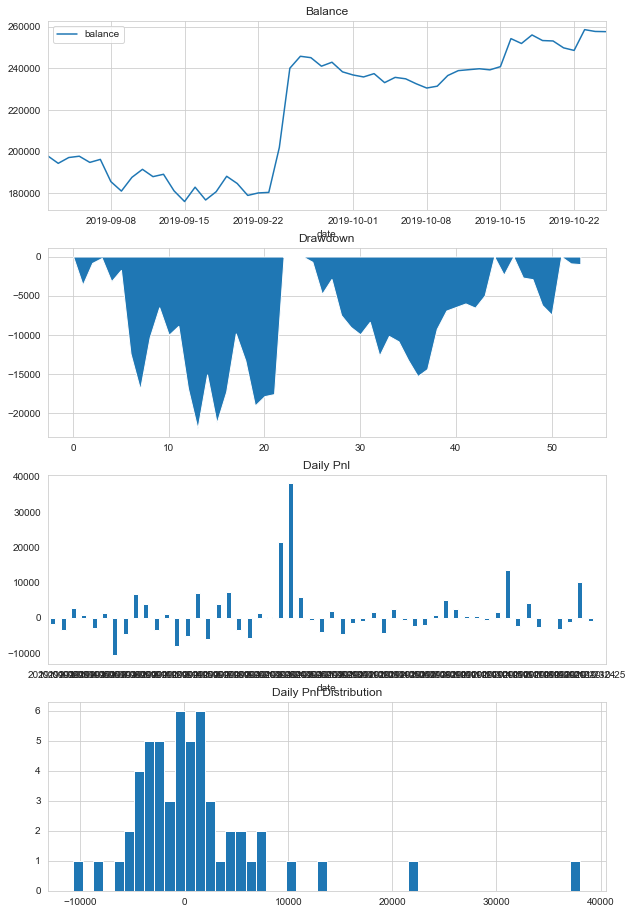

In [5]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="EOSUSDT.OKEX",
    interval="1m",
    start=datetime(2019, 9, 1),
    end=datetime(2019, 10, 25),
    rate=0.0,
    slippage=0.0,
    size=1,
    pricetick=0.01,
    capital=200_000,
)

engine.add_strategy(BollRsiAtrM15rStrategy, {})

#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics();
engine.show_chart()

In [ ]:
setting = OptimizationSetting()
setting.set_target("total_return")

setting.add_parameter("kk_length", 5, 20, 1)
setting.add_parameter("kk_dev", 0.1, 5, 0.1)
setting.add_parameter("trailing_percent", 0.1, 2, 0.1)

engine.run_ga_optimization(setting, population_size=20, ngen_size=500)